In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
#Nationwide data
data19_22 = pd.read_csv("https://raw.githubusercontent.com/claytondmalone/Business-Forecasting/main/nationwide-drugs-fy19-fy22.csv")
data19_22 = data19_22[data19_22['Drug Type'] == "Fentanyl"]
data20_23 = pd.read_csv("https://raw.githubusercontent.com/claytondmalone/Business-Forecasting/main/nationwide-drugs-fy20-fy23.csv")
data20_23 = data20_23[data20_23['Drug Type'] == "Fentanyl"]

In [9]:
nat_data = pd.concat([data19_22, data20_23], ignore_index=True, sort=False)

In [10]:
nat_data

,FY,Month (abbv),Component,Region,Land Filter,Area of Responsibility,Drug Type,Count of Event,Sum Qty (lbs)
0,2019,APR,Office of Field Operations,Coastal/Interior,Other,BALTIMORE FIELD OFFICE,Fentanyl,1,2.623501
1,2019,APR,Office of Field Operations,Coastal/Interior,Other,CHICAGO FIELD OFFICE,Fentanyl,6,1.447996
2,2019,APR,Office of Field Operations,Coastal/Interior,Other,LOS ANGELES FIELD OFFICE,Fentanyl,3,0.509709
3,2019,APR,Office of Field Operations,Coastal/Interior,Other,MIAMI FIELD OFFICE,Fentanyl,7,0.019842
4,2019,APR,Office of Field Operations,Coastal/Interior,Other,NEW ORLEANS FIELD OFFICE,Fentanyl,1,31.195410
...,...,...,...,...,...,...,...,...,...
1505,2023,SEP,U.S. Border Patrol,Southwest Border,Land Only,DEL RIO SECTOR,Fentanyl,1,0.013900
1506,2023,SEP,U.S. Border Patrol,Southwest Border,Land Only,LAREDO SECTOR,Fentanyl,1,0.044100
1507,2023,SEP,U.S. Border Patrol,Southwest Border,Land Only,SAN DIEGO SECTOR,Fentanyl,2,23.593600
1508,2023,SEP,U.S. Border Patrol,Southwest Border,Land Only,TUCSON SECTOR,Fentanyl,3,0.054400


In [11]:
nat_data["Region"].value_counts()

Southwest Border    857
Coastal/Interior    453
Northern Border     200
Name: Region, dtype: int64

In [6]:
#nat_data['Sum Qty (lbs)'] = nat_data['Sum Qty (lbs)'].astype(int)

In [12]:
nat_data.rename(columns = {'Sum Qty (lbs)':'Sum of Weight'}, inplace = True)
nat_data.rename(columns = {'Month (abbv)':'Month'}, inplace = True)

In [13]:
nat_data

,FY,Month,Component,Region,Land Filter,Area of Responsibility,Drug Type,Count of Event,Sum of Weight
0,2019,APR,Office of Field Operations,Coastal/Interior,Other,BALTIMORE FIELD OFFICE,Fentanyl,1,2.623501
1,2019,APR,Office of Field Operations,Coastal/Interior,Other,CHICAGO FIELD OFFICE,Fentanyl,6,1.447996
2,2019,APR,Office of Field Operations,Coastal/Interior,Other,LOS ANGELES FIELD OFFICE,Fentanyl,3,0.509709
3,2019,APR,Office of Field Operations,Coastal/Interior,Other,MIAMI FIELD OFFICE,Fentanyl,7,0.019842
4,2019,APR,Office of Field Operations,Coastal/Interior,Other,NEW ORLEANS FIELD OFFICE,Fentanyl,1,31.195410
...,...,...,...,...,...,...,...,...,...
1505,2023,SEP,U.S. Border Patrol,Southwest Border,Land Only,DEL RIO SECTOR,Fentanyl,1,0.013900
1506,2023,SEP,U.S. Border Patrol,Southwest Border,Land Only,LAREDO SECTOR,Fentanyl,1,0.044100
1507,2023,SEP,U.S. Border Patrol,Southwest Border,Land Only,SAN DIEGO SECTOR,Fentanyl,2,23.593600
1508,2023,SEP,U.S. Border Patrol,Southwest Border,Land Only,TUCSON SECTOR,Fentanyl,3,0.054400


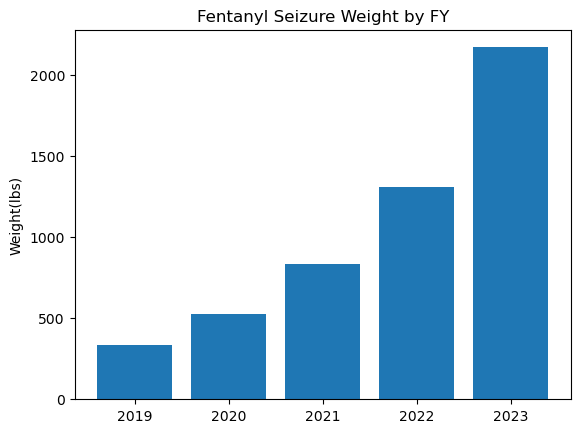

In [56]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.bar(nat_data['FY'], nat_data['Sum of Weight'])

ax.set_ylabel('Weight(lbs)')
ax.set_title('Fentanyl Seizure Weight by FY')

plt.show()

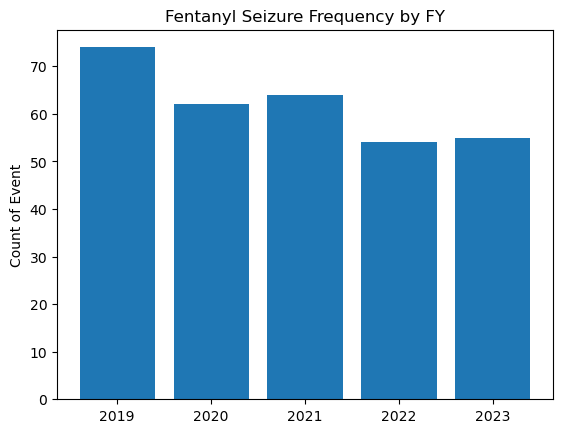

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.bar(nat_data['FY'], nat_data['Count of Event'])

ax.set_ylabel('Count of Event')
ax.set_title('Fentanyl Seizure Frequency by FY')

plt.show()

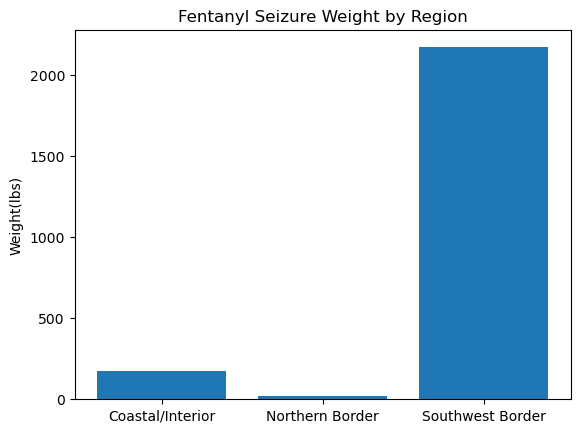

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.bar(nat_data['Region'], nat_data['Sum of Weight'])

ax.set_ylabel('Weight(lbs)')
ax.set_title('Fentanyl Seizure Weight by Region')

plt.show()

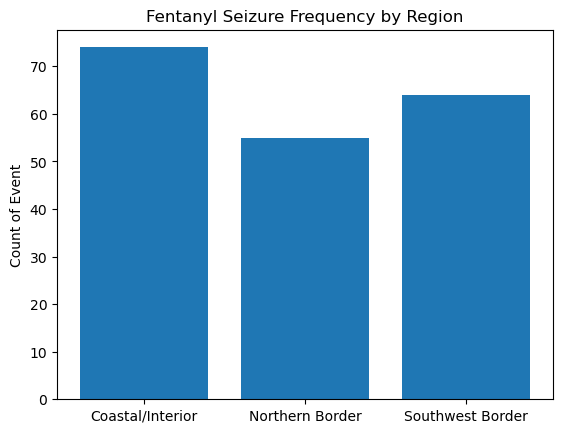

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.bar(nat_data['Region'], nat_data['Count of Event'])

ax.set_ylabel('Count of Event')
ax.set_title('Fentanyl Seizure Frequency by Region')
plt.show()

### Obeservation: Count of event and sum of weight do not have positive coorelation. The more events do no mean more weight of the drug. Southwest border seizured the biggest amount of Fentanyl among all three borders. However, more events occured at the coastal/interior border. This might indicate a trend that drug summglers are carrying bigger quantities of Fentanyl than before, especailly at the southwest border.

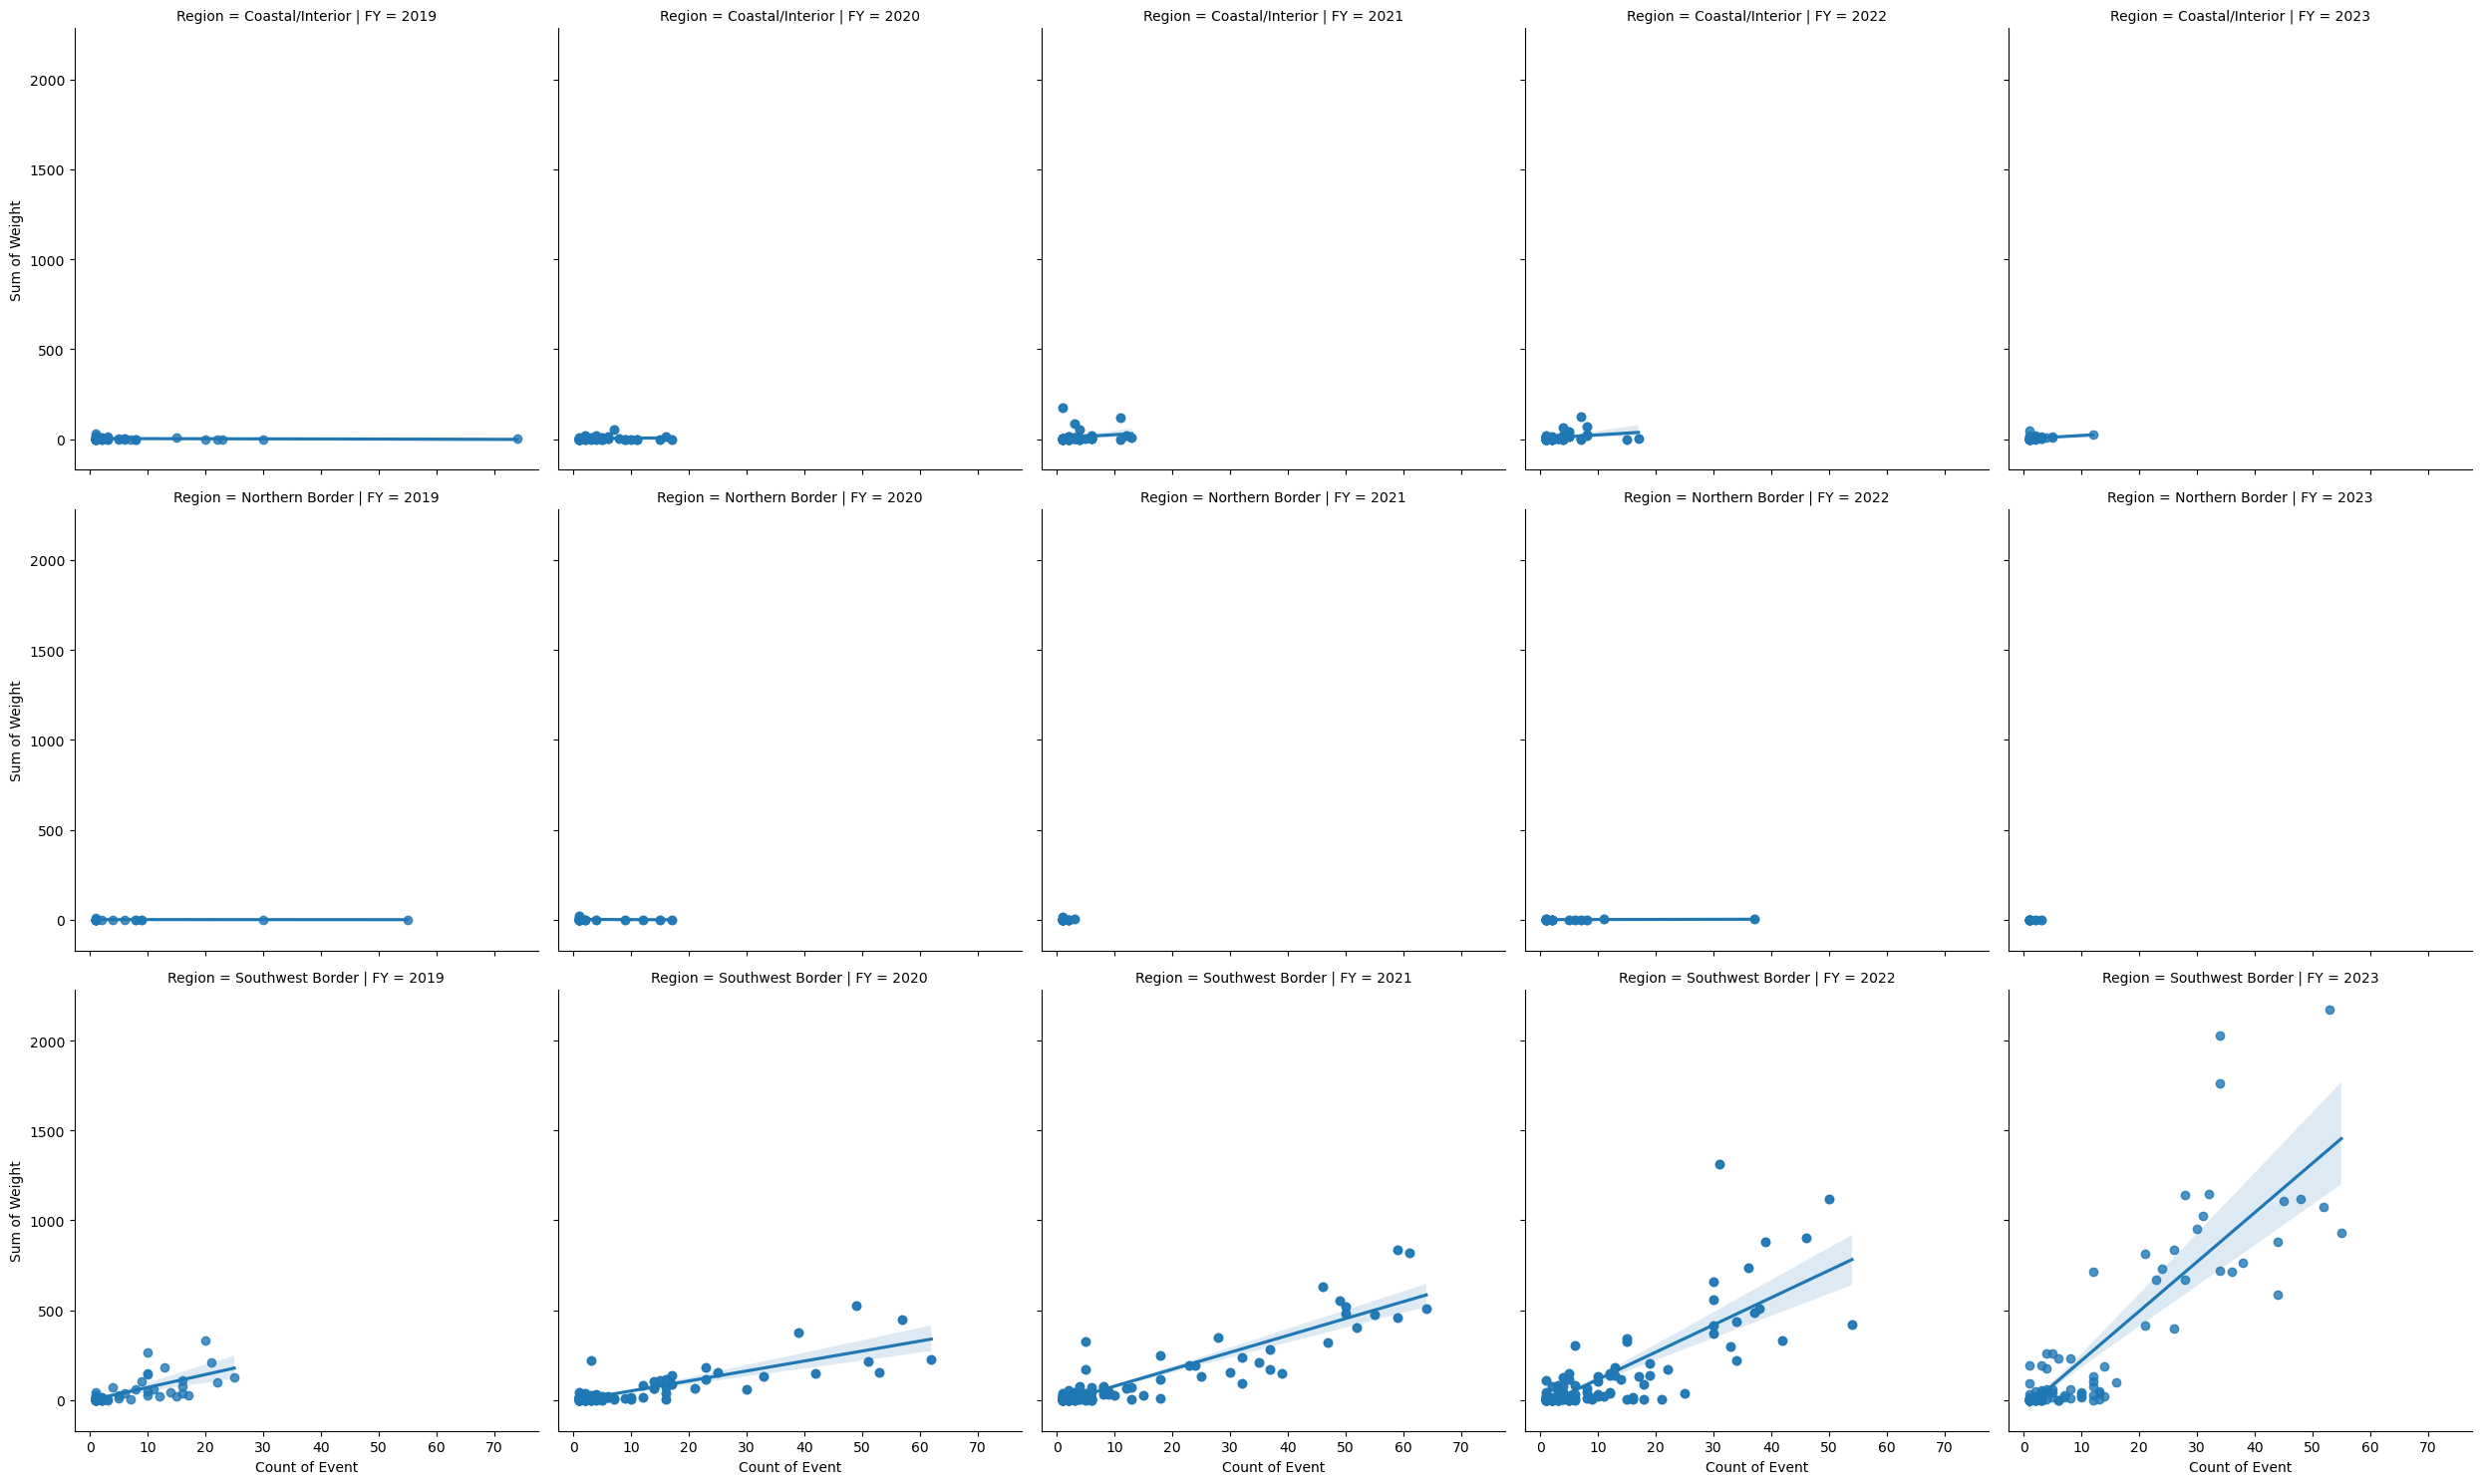

In [57]:
sns.lmplot(x='Count of Event', y='Sum of Weight', row="Region", col='FY', data=nat_data)